# <center>      Employee Turnover Prediction  </center>

<center>

### Objective

Develop a predictive model for employee turnover utilizing a comprehensive dataset of employee information. The goal is to create a robust algorithm capable of identifying and forecasting which employees are at a higher risk of leaving the company, enabling proactive retention strategies and fostering a more stable workforce.

</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [2]:
df =pd.read_csv ('E:\TechnoHacks project\\3.WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
df.shape

(1470, 35)

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Data Preprocessing

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
df.duplicated().sum()

0

In [11]:
categorical_columns = df.columns[df.dtypes == 'object']

In [12]:
categorical_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [13]:
numerical_colum = df.columns[df.dtypes == 'int64']

In [14]:
numerical_colum

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Data Visualization

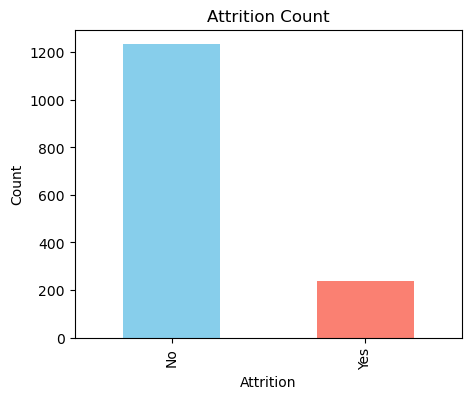

In [15]:
plt.figure(figsize=(5, 4))
df['Attrition'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

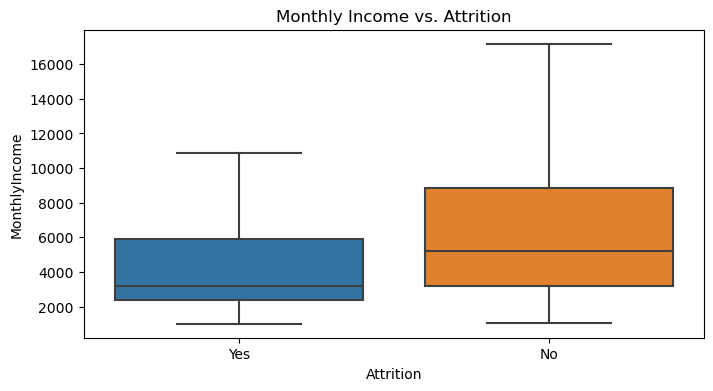

In [16]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, showfliers=False)
plt.title('Monthly Income vs. Attrition')
plt.show()


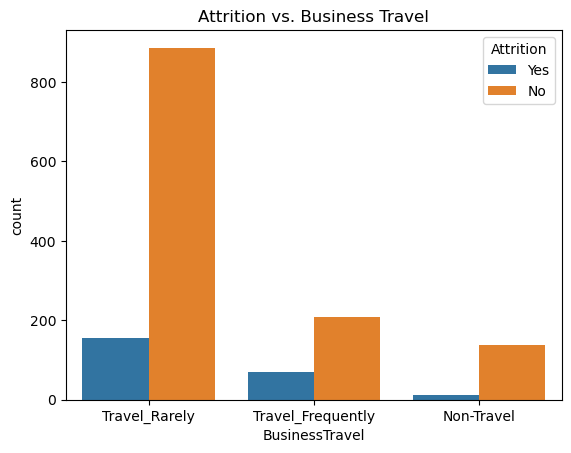

In [17]:
# Step 2: Explore relationships between features and the target variable 'Attrition'
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)
plt.title('Attrition vs. Business Travel')
plt.show()


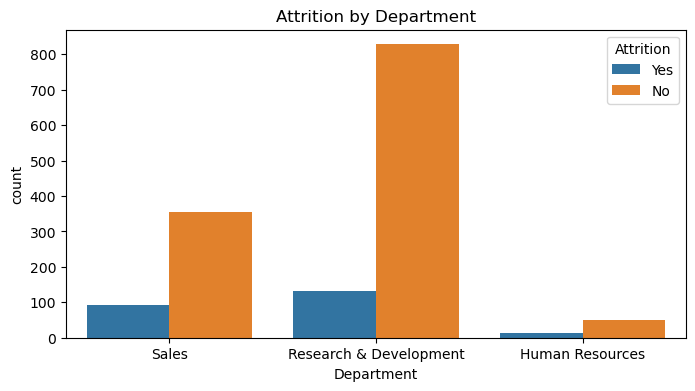

In [18]:
# Visualization 2: Attrition by Department
plt.figure(figsize=(8, 4))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.show()


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


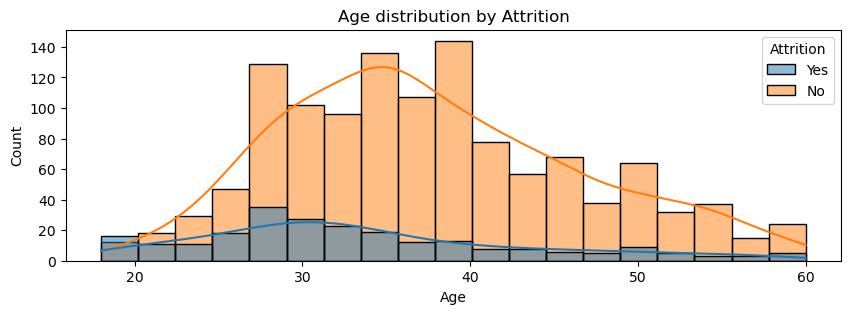

In [19]:
plt.figure(figsize=(10, 3))
sns.histplot(x='Age', hue='Attrition', data=df, kde=True)
plt.title('Age distribution by Attrition')
plt.show()

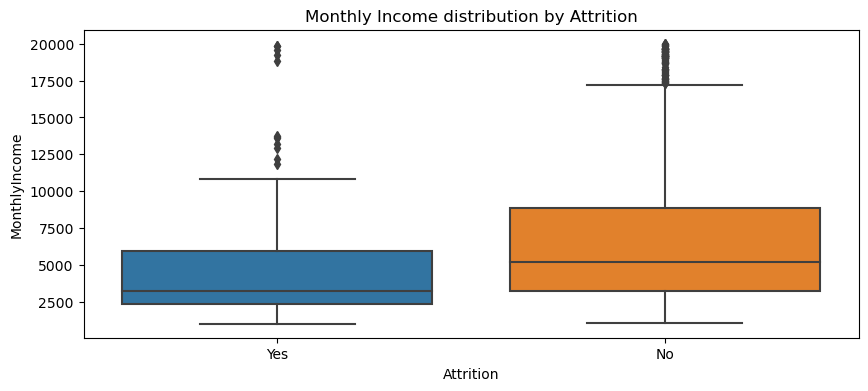

In [20]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income distribution by Attrition')
plt.show()

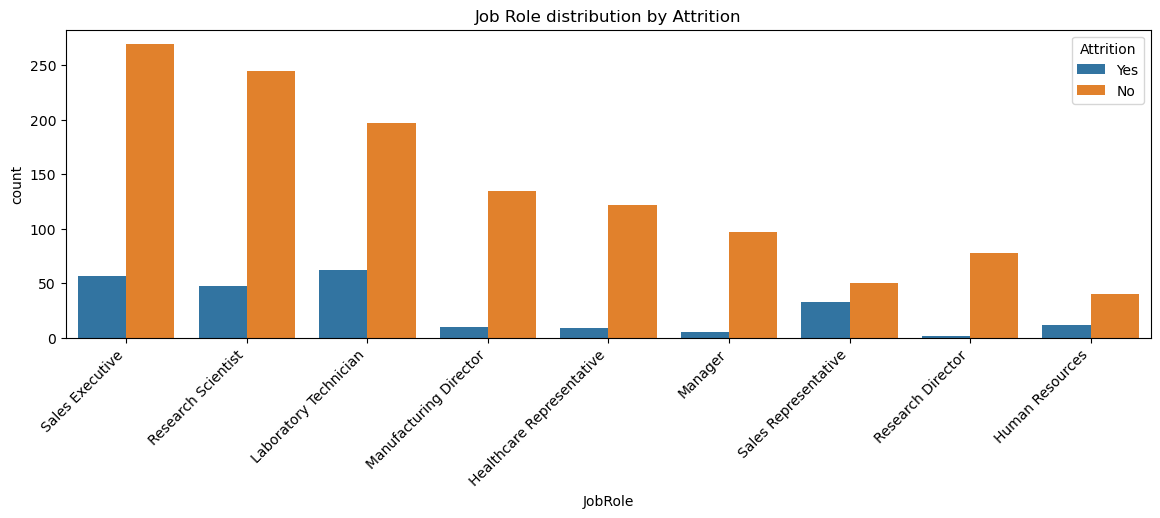

In [21]:
plt.figure(figsize=(14, 4))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('Job Role distribution by Attrition')
plt.xticks(rotation=45, ha='right')
plt.show()

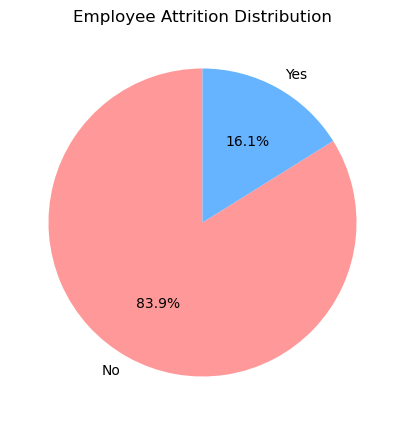

In [22]:
attrition_counts = df['Attrition'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 5))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Employee Attrition Distribution')
plt.show()

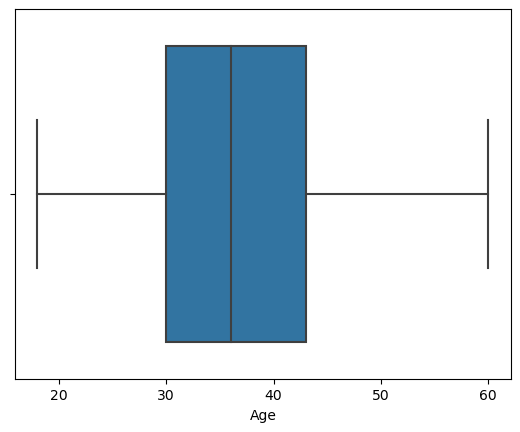

In [23]:

# Box plot for a numerical column (e.g., Age)
sns.boxplot(x=df['Age'])
plt.show()


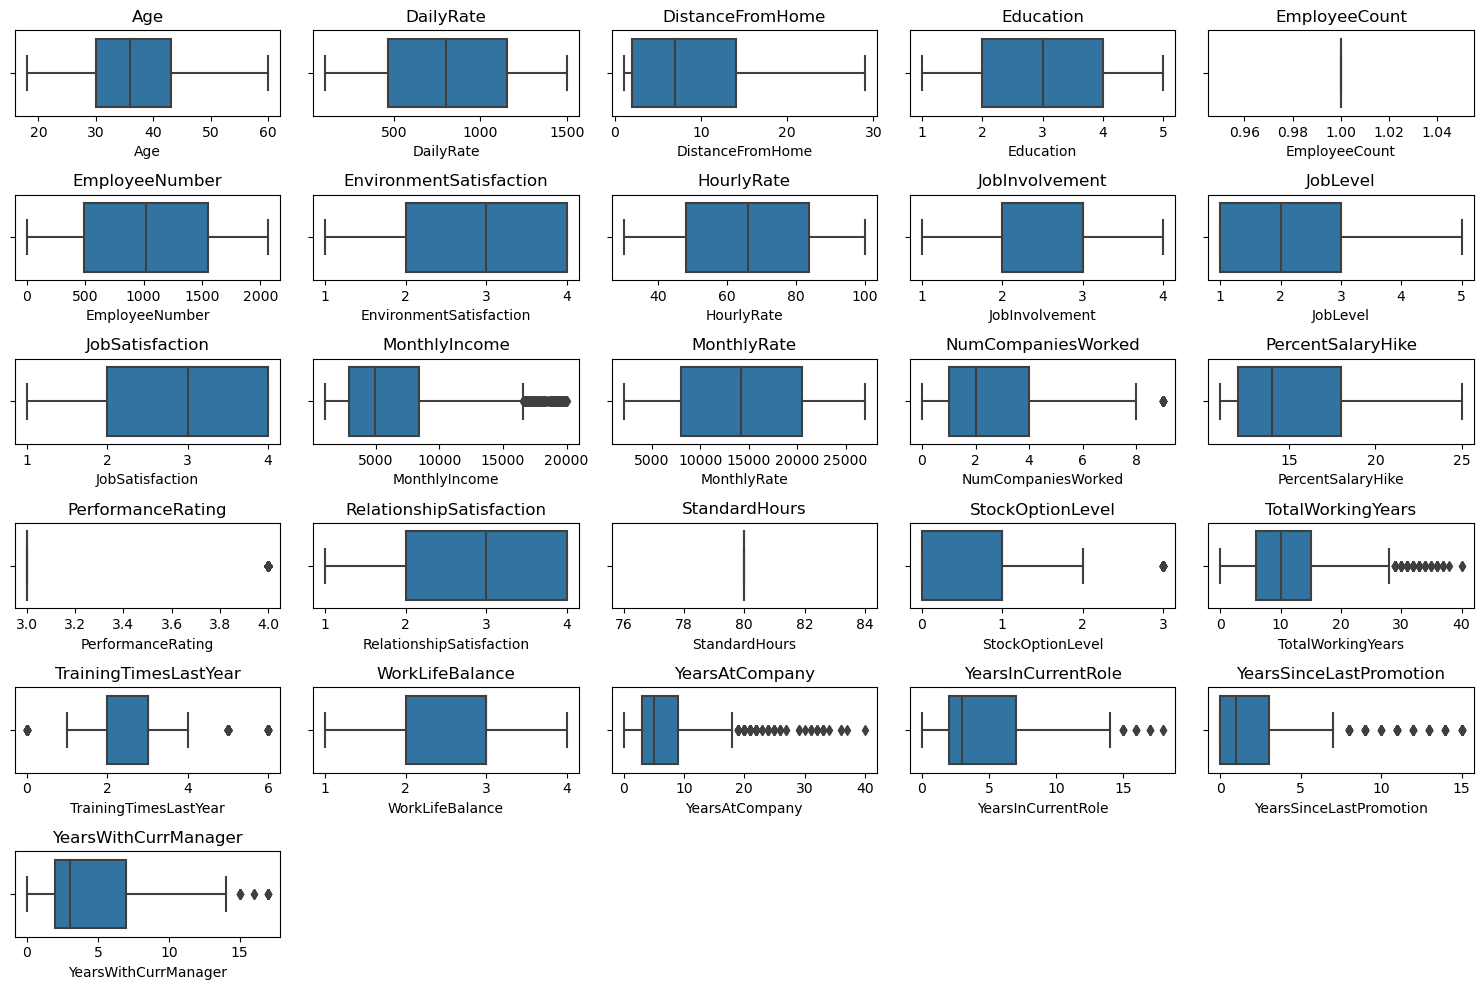

In [24]:
# Display box plots for numerical columns
numerical_columns = df.columns[df.dtypes == 'int64']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(6, 5, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

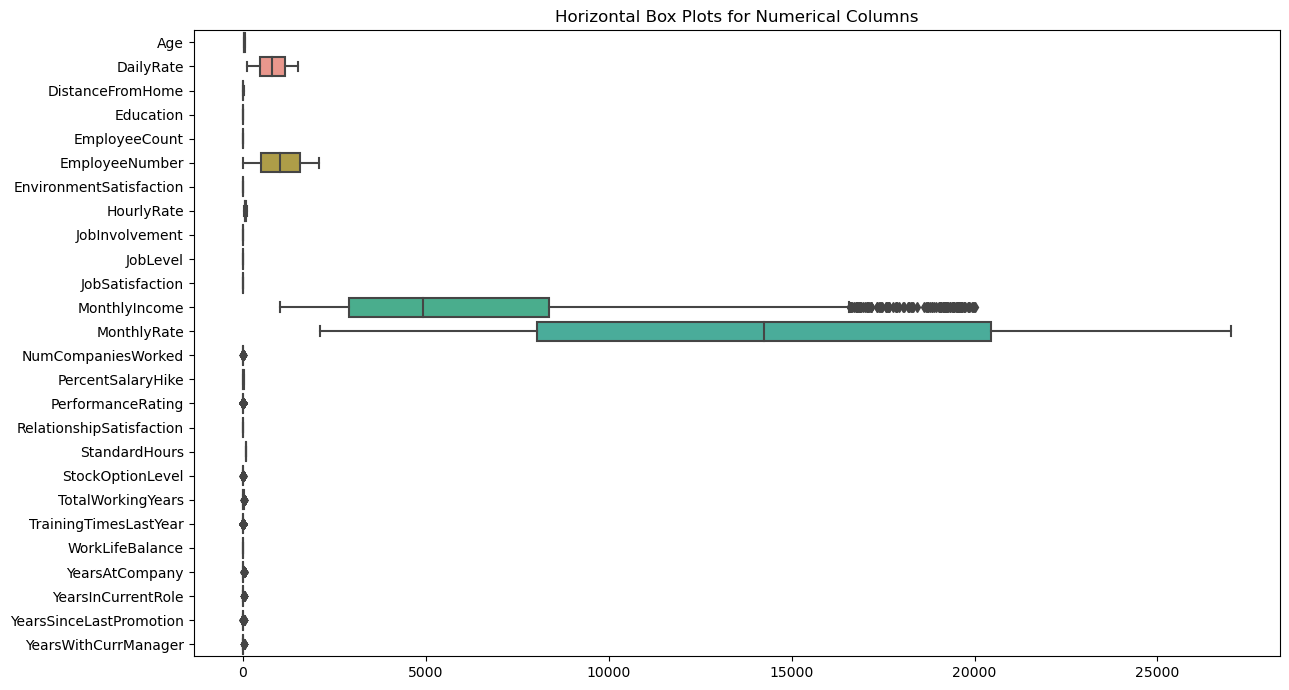

In [25]:

numerical_columns = df.select_dtypes(include='int64')

                                       # Display horizontal box plots for numerical columns
plt.figure(figsize=(13, 7))
sns.boxplot(data=numerical_columns, orient='h')
plt.title("Horizontal Box Plots for Numerical Columns")
plt.tight_layout()
plt.show()


### outlier found in monthly income 

In [26]:
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    
    if not outliers.empty:
        print(f"Outliers found in column {column}:")
        print(outliers)
    else:
        print(f"No outliers found in column {column}")

No outliers found in column Age
No outliers found in column DailyRate
No outliers found in column DistanceFromHome
No outliers found in column Education
No outliers found in column EmployeeCount
No outliers found in column EmployeeNumber
No outliers found in column EnvironmentSatisfaction
No outliers found in column HourlyRate
No outliers found in column JobInvolvement
No outliers found in column JobLevel
No outliers found in column JobSatisfaction
Outliers found in column MonthlyIncome:
      Age Attrition     BusinessTravel  DailyRate              Department  \
25     53        No      Travel_Rarely       1282  Research & Development   
29     46        No      Travel_Rarely        705                   Sales   
45     41       Yes      Travel_Rarely       1360  Research & Development   
62     50        No      Travel_Rarely        989  Research & Development   
105    59        No         Non-Travel       1420         Human Resources   
...   ...       ...                ...       

In [27]:

outlier_column ='MonthlyIncome'

Q1 = df[outlier_column].quantile(0.25)
Q3 = df[outlier_column].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[(df[outlier_column] >= (Q1 - 1.5 * IQR)) & (df[outlier_column] <= (Q3 + 1.5 * IQR))]


removed_outliers = df[~df.index.isin(df_no_outliers.index)]
if not removed_outliers.empty:
    print(f"Removed outliers in column {outlier_column}:")
    print(removed_outliers)
else:
    print(f"No outliers were removed in column {outlier_column}")

# Now, df_no_outliers contains the DataFrame without outliers in the specified column


Removed outliers in column MonthlyIncome:
      Age Attrition     BusinessTravel  DailyRate              Department  \
25     53        No      Travel_Rarely       1282  Research & Development   
29     46        No      Travel_Rarely        705                   Sales   
45     41       Yes      Travel_Rarely       1360  Research & Development   
62     50        No      Travel_Rarely        989  Research & Development   
105    59        No         Non-Travel       1420         Human Resources   
...   ...       ...                ...        ...                     ...   
1374   58        No      Travel_Rarely        605                   Sales   
1377   49        No  Travel_Frequently       1064  Research & Development   
1401   55        No      Travel_Rarely        189         Human Resources   
1437   39        No         Non-Travel        105  Research & Development   
1443   42        No      Travel_Rarely        300  Research & Development   

      DistanceFromHome  Education

In [28]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder ,StandardScaler

Categorical column converts into Numerical column

In [29]:
categorical_columns = df.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
df1 = pd.get_dummies(df, columns=categorical_columns)


In [30]:
df1

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,False,False,True,False,False,False,True,True,False,True
1,49,279,8,1,1,2,3,61,2,2,...,False,True,False,False,False,True,False,True,True,False
2,37,1373,2,2,1,4,4,92,2,1,...,False,False,False,False,False,False,True,True,False,True
3,33,1392,3,4,1,5,4,56,3,1,...,False,True,False,False,False,True,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,...,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,False,False,False,False,False,True,False,True,True,False
1466,39,613,6,1,1,2062,4,42,2,3,...,False,False,False,False,False,True,False,True,True,False
1467,27,155,4,3,1,2064,2,87,4,2,...,False,False,False,False,False,True,False,True,False,True
1468,49,1023,2,3,1,2065,4,63,2,2,...,False,False,True,False,False,True,False,True,True,False


In [31]:
correlation_matrix = df1.corr()

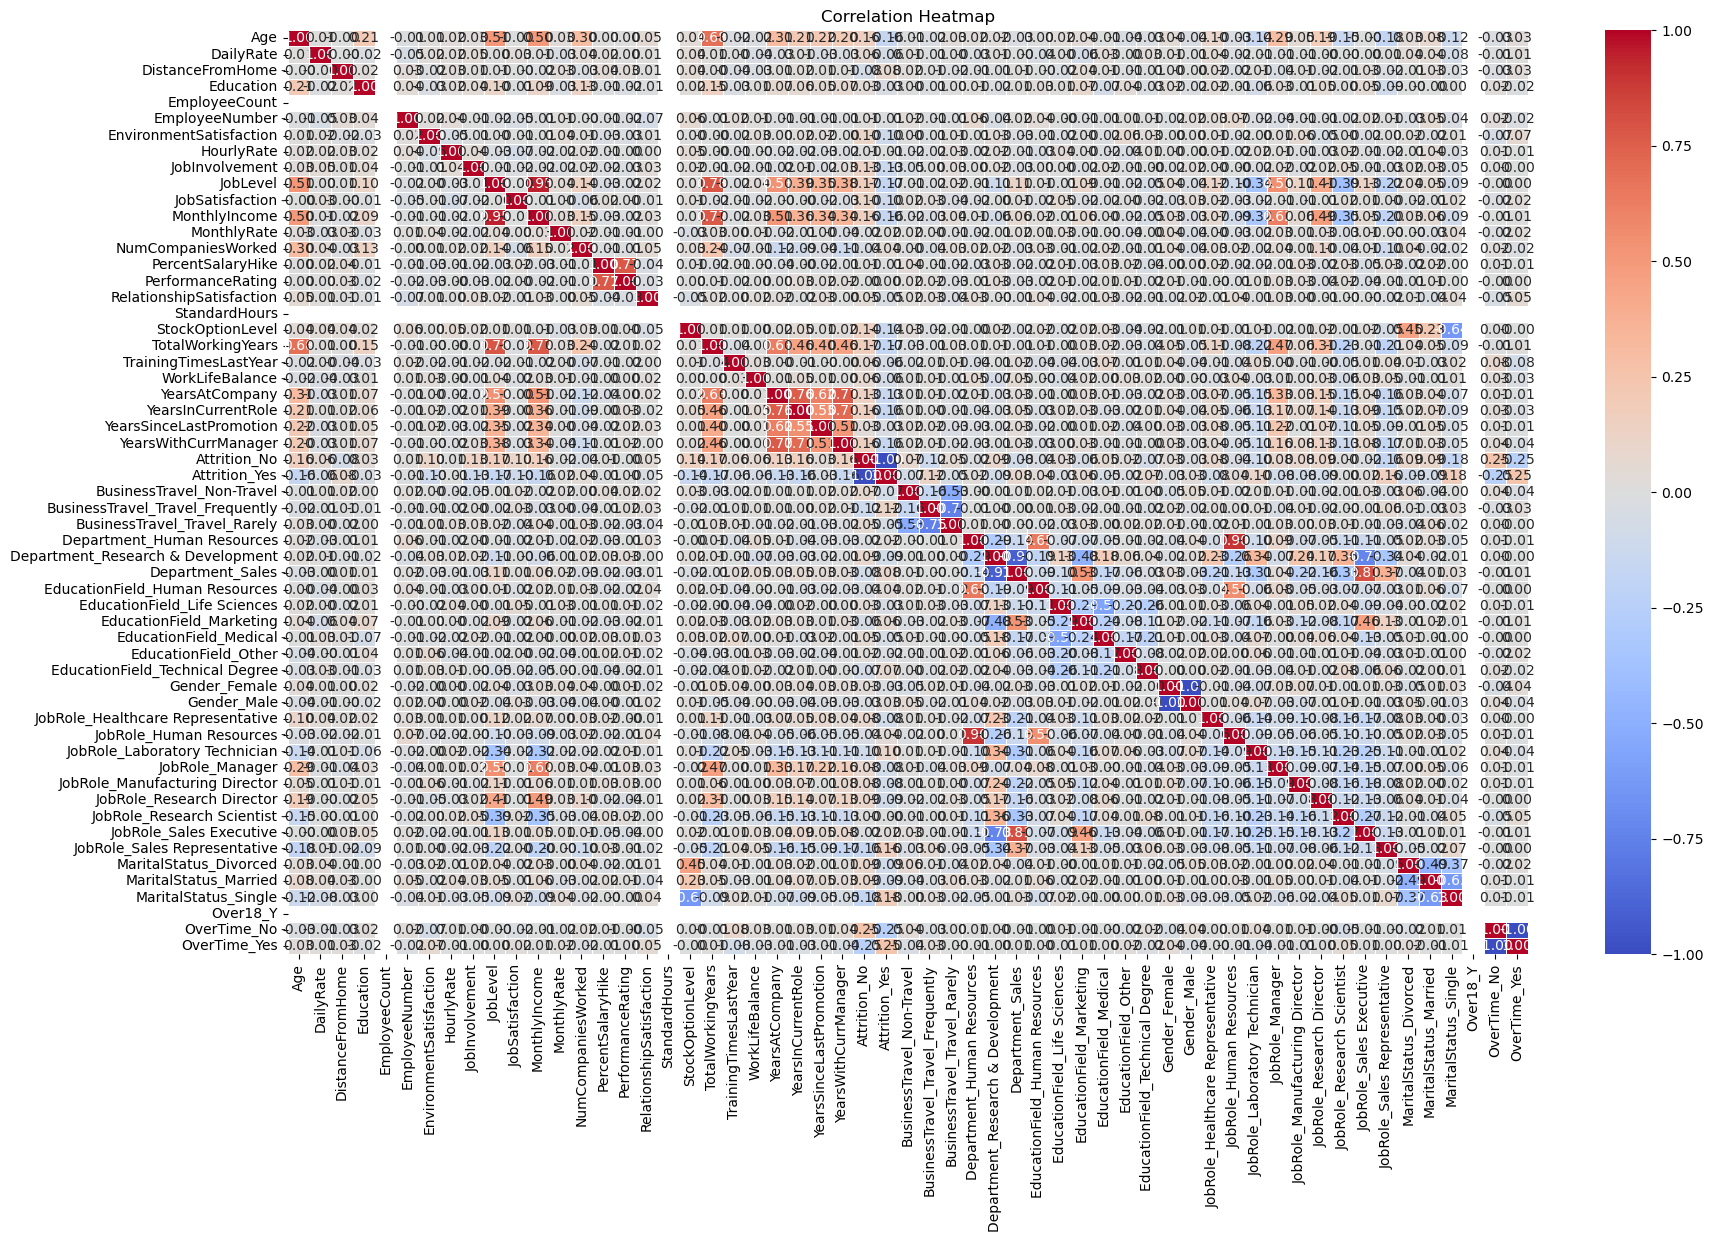

In [32]:
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EmployeeCount                      1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

# Model Selection

In [35]:
X = df1.drop(['Attrition_No', 'Attrition_Yes'], axis=1)  # Features
y = df1['Attrition_Yes']  # Target variable


In [36]:
X

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,False,False,True,False,False,False,True,True,False,True
1,49,279,8,1,1,2,3,61,2,2,...,False,True,False,False,False,True,False,True,True,False
2,37,1373,2,2,1,4,4,92,2,1,...,False,False,False,False,False,False,True,True,False,True
3,33,1392,3,4,1,5,4,56,3,1,...,False,True,False,False,False,True,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,...,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,False,False,False,False,False,True,False,True,True,False
1466,39,613,6,1,1,2062,4,42,2,3,...,False,False,False,False,False,True,False,True,True,False
1467,27,155,4,3,1,2064,2,87,4,2,...,False,False,False,False,False,True,False,True,False,True
1468,49,1023,2,3,1,2065,4,63,2,2,...,False,False,True,False,False,True,False,True,True,False


In [37]:
y

0        True
1       False
2        True
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Name: Attrition_Yes, Length: 1470, dtype: bool

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
1097,24,350,21,2,1,1551,3,57,2,1,...,False,False,False,False,True,False,False,True,True,False
727,18,287,5,2,1,1012,2,73,3,1,...,False,True,False,False,False,False,True,True,True,False
254,29,1247,20,2,1,349,4,45,3,2,...,False,False,True,False,True,False,False,True,True,False
1175,39,492,12,3,1,1654,4,66,3,2,...,False,False,False,False,False,True,False,True,True,False
1341,31,311,20,3,1,1881,2,89,3,2,...,False,False,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,750,28,3,1,1596,2,46,4,2,...,False,False,False,False,False,True,False,True,True,False
1294,41,447,5,3,1,1814,2,85,4,2,...,False,False,False,False,False,False,True,True,True,False
860,22,1256,3,4,1,1203,3,48,2,1,...,False,True,False,False,False,True,False,True,False,True
1459,29,1378,13,2,1,2053,4,46,2,2,...,False,False,False,False,False,True,False,True,False,True


In [41]:
X_test

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
1041,28,866,5,3,1,1469,4,84,3,2,...,False,False,True,False,False,False,True,True,True,False
184,53,1084,13,2,1,250,4,57,4,2,...,False,False,False,False,True,False,False,True,True,False
1222,24,240,22,1,1,1714,4,58,1,1,...,False,False,False,False,False,True,False,True,True,False
67,45,1339,7,3,1,86,2,59,3,3,...,False,True,False,False,True,False,False,True,True,False
220,36,1396,5,2,1,304,4,62,3,2,...,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,34,304,2,3,1,786,4,60,3,2,...,False,False,True,False,False,False,True,True,True,False
560,34,167,8,5,1,775,2,32,3,2,...,False,False,False,False,True,False,False,True,True,False
945,50,1322,28,3,1,1317,4,43,3,4,...,True,False,False,False,False,True,False,True,False,True
522,37,1225,10,2,1,715,4,80,4,1,...,False,True,False,False,False,False,True,True,True,False


In [42]:
y_train

1097    False
727     False
254     False
1175    False
1341    False
        ...  
1130    False
1294    False
860      True
1459    False
1126    False
Name: Attrition_Yes, Length: 1176, dtype: bool

In [43]:
y_test

1041    False
184     False
1222     True
67      False
220     False
        ...  
567     False
560     False
945     False
522     False
651     False
Name: Attrition_Yes, Length: 294, dtype: bool

# Model Training

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model = RandomForestClassifier()

In [46]:
model.fit(X_train, y_train)

RandomForestClassifier()

# Model Evaluation

In [47]:
y_predicted = model.predict(X_test)


In [48]:
model.score(X_train, y_train)       # 100% score

1.0

In [49]:
result_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_predicted})

print(result_df)


     Actual  Predicted
0     False      False
1     False      False
2      True      False
3     False      False
4     False      False
..      ...        ...
289   False      False
290   False      False
291   False      False
292   False      False
293   False      False

[294 rows x 2 columns]


# Model Decision Tree Classifier

In [50]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7789115646258503
Confusion Matrix:
[[220  35]
 [ 30   9]]
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.86      0.87       255
        True       0.20      0.23      0.22        39

    accuracy                           0.78       294
   macro avg       0.54      0.55      0.54       294
weighted avg       0.79      0.78      0.78       294



# Model Logistic Regression

In [51]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8673469387755102
Confusion Matrix:
[[255   0]
 [ 39   0]]
Classification Report:
              precision    recall  f1-score   support

       False       0.87      1.00      0.93       255
        True       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

# Now , our Model is ready

# Let's predict which employees are most likely to leave the company

In [52]:
# Assuming 'predictions' is a NumPy array
predictions_array = model.predict_proba(X)[:, 1]

# Create a Pandas DataFrame with 'EmployeeID' and 'Attrition_Probability'
predictions_df = pd.DataFrame({'EmployeeID': df['EmployeeNumber'], 'Attrition_Probability': predictions_array})

# Sort the DataFrame by 'Attrition_Probability' in descending order
top_n_employees = predictions_df.sort_values(by='Attrition_Probability', ascending=False).head(1469)

# Format the 'Attrition_Probability' column as a percentage
top_n_employees['Attrition_Probability'] = (top_n_employees['Attrition_Probability'] * 100).round(2).astype(str) + '%'


top_n_employees


,EmployeeID,Attrition_Probability
127,167,54.11%
909,1269,53.43%
688,959,51.52%
1222,1714,47.85%
463,622,47.43%
...,...,...
237,329,1.73%
477,644,1.69%
749,1038,1.68%
913,1277,1.56%


In [53]:
# Assuming 'predictions' is a NumPy array
predictions_array = model.predict_proba(X)[:, 1]

# Create a Pandas DataFrame with 'EmployeeID' and 'Attrition_Probability'
predictions_df = pd.DataFrame({'EmployeeID': df['EmployeeNumber'], 'Attrition_Probability': predictions_array})

# Sort the DataFrame by 'Attrition_Probability' in descending order
top_n_employees = predictions_df.sort_values(by='Attrition_Probability', ascending=False).head(1469)

# Display the top N employees with 'Attrition_Probability' formatted as a percentage
top_n_employees.style.format({'Attrition_Probability': '{:.2%}'})


,EmployeeID,Attrition_Probability
127,167,54.11%
909,1269,53.43%
688,959,51.52%
1222,1714,47.85%
463,622,47.43%
748,1037,46.70%
14,19,46.42%
911,1273,45.80%
460,618,44.14%
470,632,43.61%
